In [1]:
#import needed libraries
import math
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

C:\Users\dylan\AppData\Local\Temp\ipykernel_7292\684007647.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
"""

    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]
"""
def load_data():
    
    df = pd.read_csv('./heart.csv')
    df.describe()
        #First we need to turn the categorical data into numbers
    #for sex, M = 0, F = 1
    df['Sex'] = df['Sex'].transform(lambda sex: 0 if sex == 'M' else 1)
    
    df['ChestPainType'].unique()
    #ATA = 0, NAP = 1, ASY = 2, TA = 3
    df['ChestPainType'] = df['ChestPainType'].transform(lambda pain_type: 0 if pain_type == 'ATA' else 1 if pain_type == 'NAP' else 2 if pain_type == 'ASY' else 3)
    
    #restingECG Normal = 0, ST(ST-T wave abnormality) = 1, LVH(probably or definite left ventricular hypertrophy) = 2
    df['RestingECG'] = df['RestingECG'].transform(lambda ecg: 0 if ecg == 'Normal' else 1 if ecg == 'ST' else 2)
    
    #Exercise Angina (chest pain)
    #Y = 1, N = 0
    df['ExerciseAngina'] = df['ExerciseAngina'].transform(lambda angia: 0 if angia == 'N' else 1)
    
    #ST Slope
    #up = 0, flat = 1, down = 2
    df['ST_Slope'] = df['ST_Slope'].transform(lambda slope: 0 if slope == 'Up' else 1 if slope == 'Flat' else 2)

    return df

def evaluate_sk(model, test_sizes, X, Y, file_name, title):
    test_results, train_results = [], []
    for size in test_sizes:
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=0)
        model.fit(x_train, y_train)
        test_results.append(model.score(x_test, y_test))
        train_results.append(model.score(x_train, y_train))

    plt.title(title)

    plt.plot(train_results, label='Train')
    plt.plot(test_results, label='Test')
    plt.xticks([i * 10 for i in test_sizes], test_sizes + [])
    plt.ylim((.1, 1.1))
    plt.ylabel('Accuracy')
    plt.xlabel('Test Porportion')
    plt.legend()
    plt.savefig(file_name)
    plt.show()
    plt.clf()

def get_max_test_score_idx(plot):
    mean_scores = plot.test_scores.mean(axis=1)
    return mean_scores.argmax(), mean_scores.max()


In [69]:
#split data into x, y
df = load_data()
X = df.drop(['HeartDisease'], axis=1)
Y = df['HeartDisease']

#split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

In [70]:
#fig = plt.figure(figsize = (16, 16))
#_  = plot_tree(classifier)

'''
This model is way overfitted with 18 layers of depth, we need to prune.
'''

'\nThis model is way overfitted with 18 layers of depth, we need to prune.\n'

In [71]:
'''
Let's take a look at correlations
'''
df = load_data()
print(df.corrwith(df['HeartDisease']))
'''
RestingBP and RestingECG have very weak correlations, let's remove them.

'''
'''
We need to divide the data into X and Y and split again 
'''
X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

Age               0.282039
Sex              -0.305445
ChestPainType     0.459017
RestingBP         0.107589
Cholesterol      -0.232741
FastingBS         0.267291
RestingECG        0.061011
MaxHR            -0.400421
ExerciseAngina    0.494282
Oldpeak           0.403951
ST_Slope          0.558771
HeartDisease      1.000000
dtype: float64


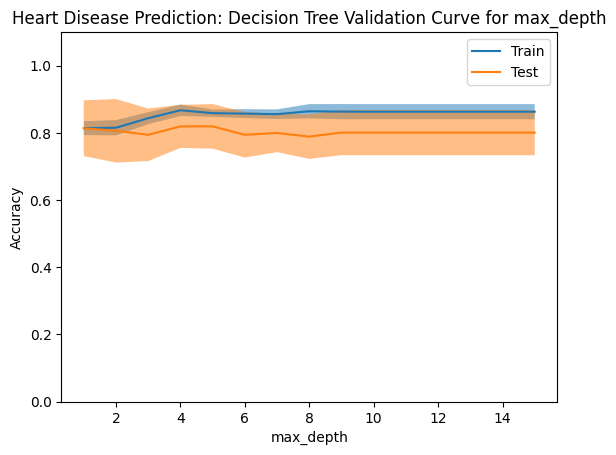

In [72]:
#gini pruning
clf = DecisionTreeClassifier().fit(x_train, y_train)
clf.score(x_test, y_test)

plot = ValidationCurveDisplay.from_estimator(
    DecisionTreeClassifier(random_state=0, max_features=5, min_samples_split=60),
    X,
    Y,
    param_name="max_depth",
    param_range=[i for i in range(1, 16)],
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)
plt.title("Heart Disease Prediction: Decision Tree Validation Curve for max_depth")
plot.ax_.set_ylim((0, 1.1))
plt.savefig('./images/p1.1.png')



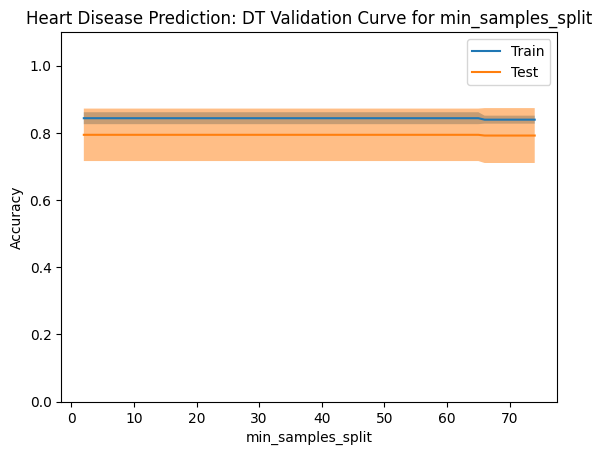

In [73]:
clf = DecisionTreeClassifier().fit(x_train, y_train)
clf.score(x_test, y_test)

plot = ValidationCurveDisplay.from_estimator(
    DecisionTreeClassifier(random_state=0, max_features=5, max_depth=3),
    X,
    Y,
    param_name="min_samples_split",
    param_range=[i for i in range(1, 75)],
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)
plt.title("Heart Disease Prediction: DT Validation Curve for min_samples_split")
plot.ax_.set_ylim((0, 1.1))
plt.savefig('./images/p1.2.png')

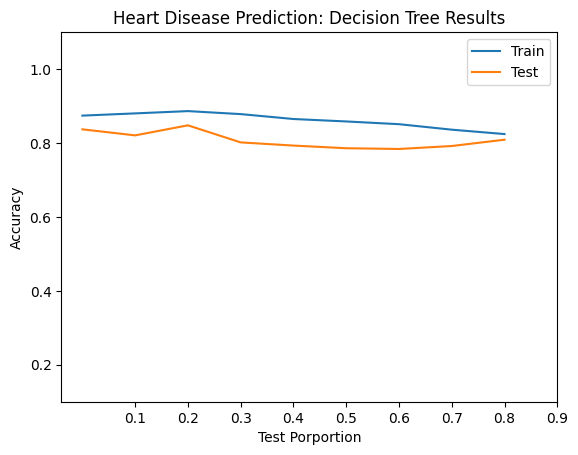

<Figure size 640x480 with 0 Axes>

In [3]:
df = load_data()
X, Y= df.drop('HeartDisease', axis=1), df['HeartDisease']

tree = DecisionTreeClassifier(min_samples_split=40, max_depth=4, ccp_alpha=.002)
evaluate_sk(tree, [i/10 for i in range(1, 10)], X, Y, './images/p1.3.png', 'Heart Disease Prediction: Decision Tree Results')

In [5]:
#Boosted Decision Tree time
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
df = load_data()
#First reset x and y
#split data into x, y
X = df.drop('HeartDisease', axis=1)
Y = df['HeartDisease']

#split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

(8, 0.8288904727963887)


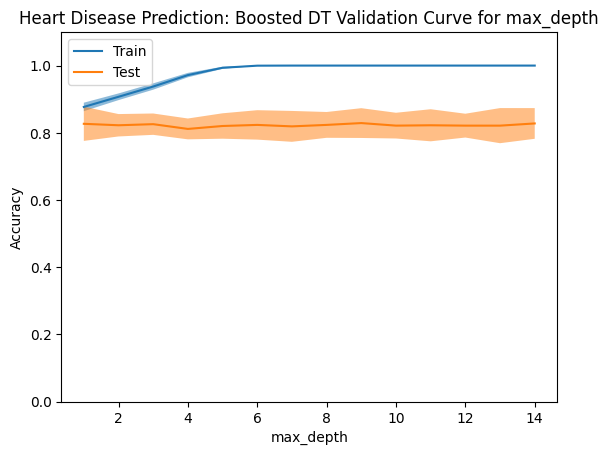

In [77]:
clf = GradientBoostingClassifier(min_samples_split=20, max_features=math.ceil(math.sqrt(df.shape[1])), verbose=1, random_state=0)

plot = ValidationCurveDisplay.from_estimator(
    clf,
    X,
    Y,
    param_name="max_depth",
    param_range=[i for i in range(1, 15)],
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)
plt.title("Heart Disease Prediction: Boosted DT Validation Curve for max_depth")
plot.ax_.set_ylim((0, 1.1))
plt.savefig('./images/p2.1.png')

print(get_max_test_score_idx(plot))

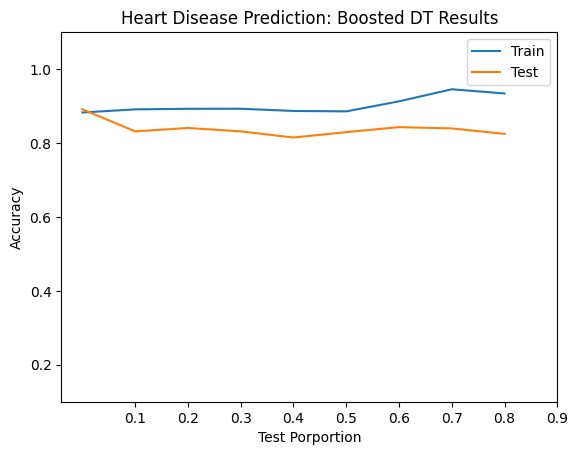

<Figure size 640x480 with 0 Axes>

In [6]:
df = load_data()
X, Y= df.drop('HeartDisease', axis=1), df['HeartDisease']

tree = GradientBoostingClassifier(min_samples_split=40, max_depth=8, ccp_alpha=.002)
evaluate_sk(tree, [i/10 for i in range(1, 10)], X, Y, './images/p2.3.png', 'Heart Disease Prediction: Boosted DT Results')

(46, 0.8310406272273699)


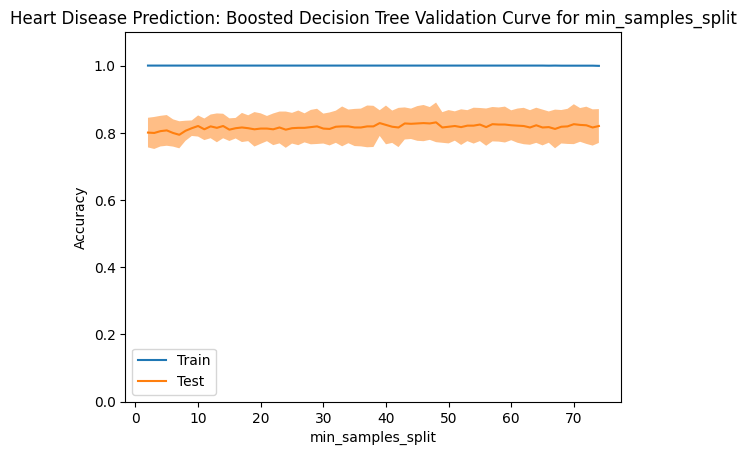

In [78]:
clf = GradientBoostingClassifier(max_depth=8, verbose=1, random_state=0)

plot = ValidationCurveDisplay.from_estimator(
    clf,
    X,
    Y,
    param_name="min_samples_split",
    param_range=[i for i in range(2, 75)],
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)
plt.title("Heart Disease Prediction: Boosted DT Curve for min_samples_split")
plot.ax_.set_ylim((0, 1.1))
plt.savefig('./images/p2.2.png')
print(get_max_test_score_idx(plot))


In [79]:
#now lets drop the same data as the traditional tree 
'''
RestingBP and RestingECG have very weak correlations, let's remove them.
'''
df_nobp_noecg = load_data()
df_nobp_noecg = df_nobp_noecg.drop(['RestingBP', 'RestingECG'], axis=1)
'''
We need to divide the data into X and Y and split again 
'''
X = df_nobp_noecg.drop('HeartDisease', axis=1)
Y = df_nobp_noecg['HeartDisease']
x_train, x_test, y_train, y_test = x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

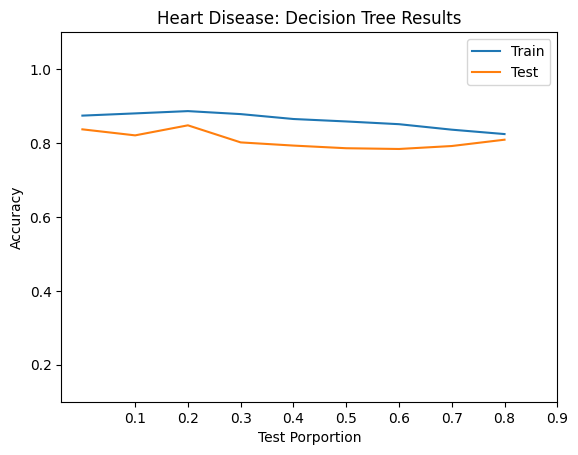

<Figure size 640x480 with 0 Axes>

In [80]:
df = load_data()
X, Y= df.drop('HeartDisease', axis=1), df['HeartDisease']

tree = DecisionTreeClassifier(min_samples_split=40, max_depth=4, ccp_alpha=.002)
evaluate_sk(tree, [i/10 for i in range(1, 10)], X, Y, './images/p1.3.png', 'Heart Disease: Decision Tree Results')

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
df = load_data()
X, Y = df.drop(['HeartDisease'], axis=1), df['HeartDisease'] 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

Axes(0.125,0.11;0.775x0.77)
(38, 0.699305060584462)


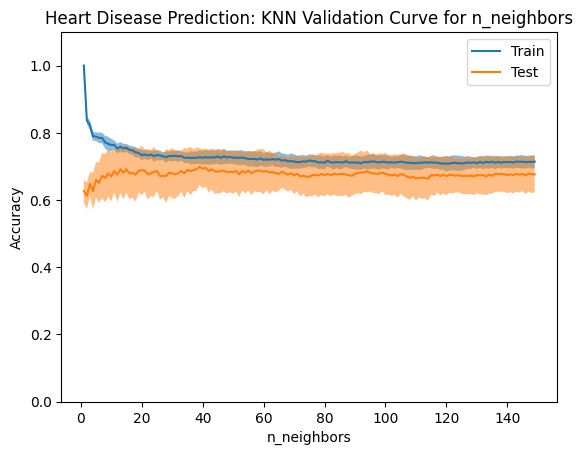

In [83]:
neighbors = KNeighborsClassifier(algorithm='brute')
plot = ValidationCurveDisplay.from_estimator(
    neighbors,
    X,
    Y,
    param_name="n_neighbors",
    param_range=[i for i in range(1, 150)],
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)
print(plot.ax_)
plt.title("Heart Disease Prediction: KNN Validation Curve for n_neighbors")
plot.ax_.set_ylim((0, 1.1))
plt.savefig('./images/p3.1.png')
print(get_max_test_score_idx(plot))

0.6793478260869565 0.6956521739130435


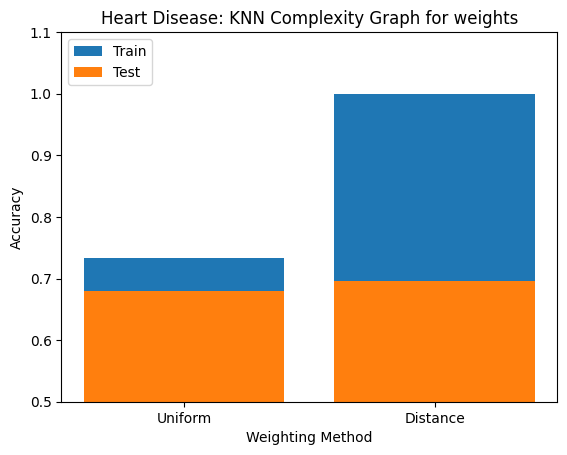

In [84]:
distance = KNeighborsClassifier(n_neighbors=38, weights='distance').fit(x_train, y_train)
uniform = KNeighborsClassifier(n_neighbors=38, weights='uniform').fit(x_train, y_train)
uniform_train, uniform_test = uniform.score(x_train, y_train), uniform.score(x_test, y_test)
distance_train, distance_test = distance.score(x_train, y_train), distance.score(x_test, y_test)
labels = ['Uniform', 'Distance']
test, train = [uniform_test, distance_test], [uniform_train, distance_train]
plt.bar(labels, train)

plt.bar(labels, test)
plt.legend(["Train", "Test"], loc='upper left')
plt.title("Heart Disease: KNN Complexity Graph for weights")
plt.ylim((.5, 1.1))
plt.ylabel('Accuracy')
plt.xlabel('Weighting Method')
plt.savefig('./images/p3.2.png')
print(uniform_test, distance_test)

In [85]:
#exclude categorical data besides age
df = load_data()
X, Y = df.drop(['HeartDisease', 'RestingECG'], axis=1), df['HeartDisease'] 
#X, Y = df.drop(['HeartDisease'], axis=1), df['HeartDisease'] 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

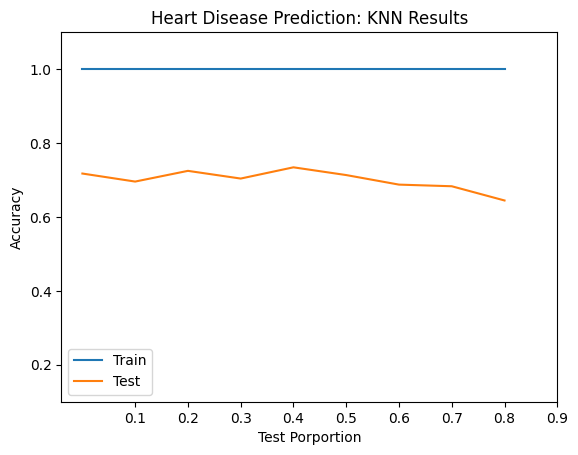

<Figure size 640x480 with 0 Axes>

In [9]:
df = load_data()
X, Y= df.drop('HeartDisease', axis=1), df['HeartDisease']

tree = KNeighborsClassifier(n_neighbors=38, weights='distance')
evaluate_sk(tree, [i/10 for i in range(1, 10)], X, Y, './images/p3.3.png', 'Heart Disease Prediction: KNN Results')

In [87]:
from sklearn.metrics import pairwise

In [88]:
'''
cityblock: Score = 0.7336956521739131, n = 5
cosine: Score = 0.7065217391304348, n = 23
euclidean: Score = 0.7445652173913043, n = 10
l2: Score = 0.7445652173913043, n = 10
l1: Score = 0.7336956521739131, n = 5
manhattan: Score = 0.7336956521739131, n = 5
nan_euclidean: Score = 0.7445652173913043, n = 10
'''


'\ncityblock: Score = 0.7336956521739131, n = 5\ncosine: Score = 0.7065217391304348, n = 23\neuclidean: Score = 0.7445652173913043, n = 10\nl2: Score = 0.7445652173913043, n = 10\nl1: Score = 0.7336956521739131, n = 5\nmanhattan: Score = 0.7336956521739131, n = 5\nnan_euclidean: Score = 0.7445652173913043, n = 10\n'

In [11]:
from sklearn import svm

In [90]:
df = load_data()
X, Y = df.drop(['HeartDisease', 'RestingBP', 'RestingECG'], axis=1), df['HeartDisease'] 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)


vm1 = svm.SVC(kernel='poly', random_state=0, tol=.001).fit(x_train, y_train)
vm2 = svm.SVC(kernel='linear', random_state=0, tol=.001).fit(x_train, y_train)
vm3 = svm.SVC(kernel='rbf', random_state=0, tol=.001).fit(x_train, y_train)
vm4 = svm.SVC(kernel='sigmoid', random_state=0, tol=.001).fit(x_train, y_train)


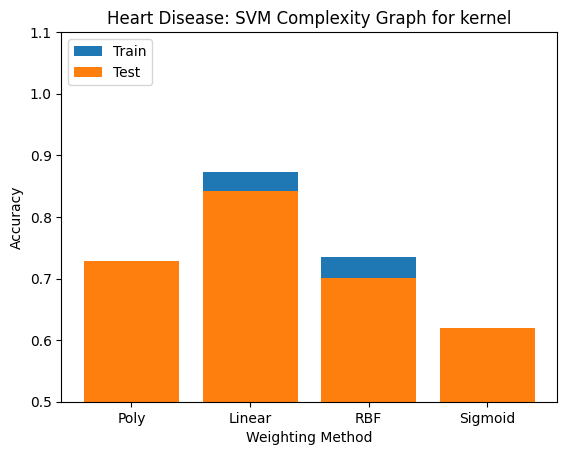

In [91]:
labels = ['Poly', 'Linear', 'RBF', 'Sigmoid']
df = load_data()
X, Y = df.drop(['HeartDisease', 'RestingBP', 'RestingECG'], axis=1), df['HeartDisease'] 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
test = [vm1.score(x_test, y_test), vm2.score(x_test, y_test), vm3.score(x_test, y_test), vm4.score(x_test, y_test)]
train = [vm1.score(x_train, y_train), vm2.score(x_train, y_train), vm3.score(x_train, y_train), vm4.score(x_train, y_train)]
plt.bar(labels, train)

plt.bar(labels, test)
plt.legend(["Train", "Test"], loc='upper left')
plt.title("Heart Disease: SVM Complexity Graph for kernel")
plt.ylim((.5, 1.1))
plt.ylabel('Accuracy')
plt.xlabel('Weighting Method')
plt.savefig('./images/p4.2.png')

(19, 0.8191138037538608)


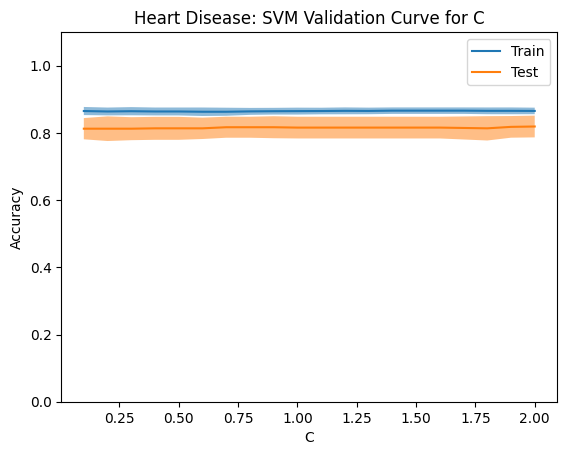

In [92]:
vm = svm.SVC(kernel='linear', random_state=0, tol=.001).fit(x_train, y_train)
plot = ValidationCurveDisplay.from_estimator(
    vm,
    X,
    Y,
    param_name="C",
    param_range=[i/10 for i in range(1, 21)],
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)
plt.title("Heart Disease: SVM Validation Curve for C")
plot.ax_.set_ylim((0, 1.1))
plt.savefig('./images/p4.1.png')
print(get_max_test_score_idx(plot))

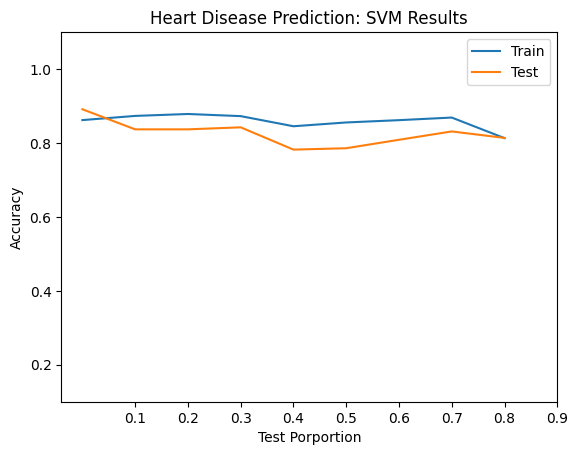

<Figure size 640x480 with 0 Axes>

In [14]:
df = load_data()
X, Y= df.drop('HeartDisease', axis=1), df['HeartDisease']

tree = svm.SVC(kernel='linear', C = 1)
evaluate_sk(tree, [i/10 for i in range(1, 10)], X, Y, './images/p4.3.png', 'Heart Disease Prediction: SVM Results')

In [93]:
#convert our pd df to a tensor
df = load_data()
tensor = torch.tensor(df[:10].values)

In [94]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [95]:
'''
Some code here is modified from https://pytorch.org/docs/
'''

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as nf
from sklearn.model_selection import train_test_split
torch.manual_seed(0)

X = df.drop(columns=['HeartDisease']).values
Y = df['HeartDisease'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

class HeartDiseaseClassifier(nn.Module):
    def __init__(self, input_size, dropout_rate=.7):
        
        super(HeartDiseaseClassifier, self).__init__()

        self.fc1 = nn.Linear(input_size, 256)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

        self.ru = nn.ReLU()

    def forward(self, x):

        x = self.fc1(x)
        x = self.ru(x)
        x = self.dropout(x)

        x = self.fc2(x)
        x = self.sigmoid(x)

        x = self.fc3(x)
        x = self.ru(x)

        x = self.fc4(x)
        x = self.ru(x)

        x = self.fc5(x)
        x = self.sigmoid(x)
        return x

    def set_dropout_p(self, p):
        self.dropout = nn.Dropout(p=p)



def get_accuracy(x_to_measure, y_to_measure):
    with torch.no_grad():
        inputs = torch.Tensor(x_to_measure).float()
        labels = torch.Tensor(y_to_measure).view(-1, 1).float()
        outputs = model(inputs)
        predicted_train = (outputs > 0.5).float()
        return (predicted == labels).sum().item() / len(labels)


test_vals = []
train_vals = []


def train_model(num_epochs, drop_p=.7):
    input_size = x_train.shape[1]
    model = HeartDiseaseClassifier(input_size, drop_p)
    
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    max = {'epoch': 0, 'max': 0}
    for epoch in range(num_epochs):
    
        inputs = torch.Tensor(x_train).float()
        labels = torch.Tensor(y_train).view(-1, 1).float()
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #test model ever 100 epochs
        #test model ever 100 epochs
        if epoch % 100 == 0:
            test_val = score_nn(model, x_test, y_test)
            train_val = score_nn(model, x_train, y_train)
            test_vals.append(test_val)
            train_vals.append(train_val)

    return model
'''
epoch_values = [25 * i for i in range(1, 100)]
train_accuracy = [get_accuracy(train_model(e), x) for e in epoch_values]
print(epoch_values, accuracy)
'''



def score_nn(model, x, y):
    outputs = (model(torch.Tensor(x)) > .5).int()
    y = torch.Tensor(y).int().view(-1, 1)
    accuracy = (y == outputs).int().sum() / len(y)
    return float(accuracy)



model = train_model(2000)


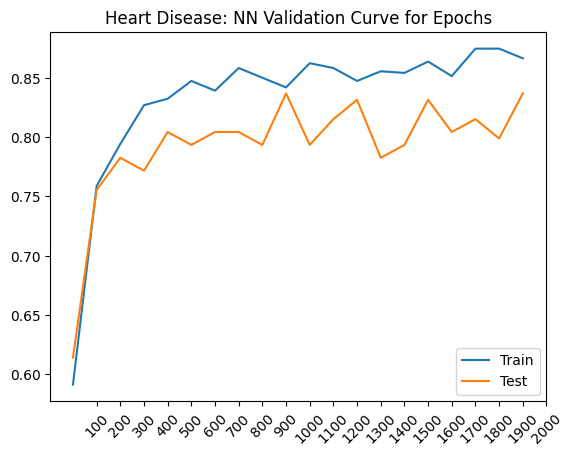

In [96]:
plt.plot(train_vals, label='Train')
plt.plot(test_vals, label='Test')
plt.xticks([i for i in range(1, 21)], [100 * i for i in range(1, 21)], rotation=45) 
plt.legend(loc='lower right')
plt.title("Heart Disease: NN Validation Curve for Epochs")
plt.savefig('./images/p5.1.png')



In [97]:
def get_accuracy():
    with torch.no_grad():
        inputs = torch.Tensor(X_test).float()
        labels = torch.Tensor(y_test).view(-1, 1).float()
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        accuracy = (predicted == labels).sum().item() / len(labels)
        return accuracy


In [98]:
ps = [i/10 for i in range(1, 10)]
d_test_vals = []
d_train_vals = []
for p in ps:
    model = train_model(900, p)
    print('Trained')
    test_val = score_nn(model, x_test, y_test)
    train_val = score_nn(model, x_train, y_train)
    d_test_vals.append(test_val)
    d_train_vals.append(train_val)

print(test_vals)

Trained
Trained
Trained
Trained
Trained
Trained
Trained
Trained
Trained
[0.614130437374115, 0.7554348111152649, 0.782608687877655, 0.77173912525177, 0.804347813129425, 0.79347825050354, 0.804347813129425, 0.804347813129425, 0.79347825050354, 0.8369565010070801, 0.79347825050354, 0.8152173757553101, 0.83152174949646, 0.782608687877655, 0.79347825050354, 0.83152174949646, 0.804347813129425, 0.8152173757553101, 0.7989130616188049, 0.8369565010070801, 0.58152174949646, 0.7989130616188049, 0.8152173757553101, 0.7880434989929199, 0.83152174949646, 0.79347825050354, 0.804347813129425, 0.8152173757553101, 0.7771739363670349, 0.58152174949646, 0.79347825050354, 0.7989130616188049, 0.8152173757553101, 0.7880434989929199, 0.8097826242446899, 0.820652186870575, 0.79347825050354, 0.7989130616188049, 0.5489130616188049, 0.7771739363670349, 0.7880434989929199, 0.8369565010070801, 0.8478260636329651, 0.820652186870575, 0.8260869383811951, 0.8260869383811951, 0.8097826242446899, 0.58152174949646, 0.760

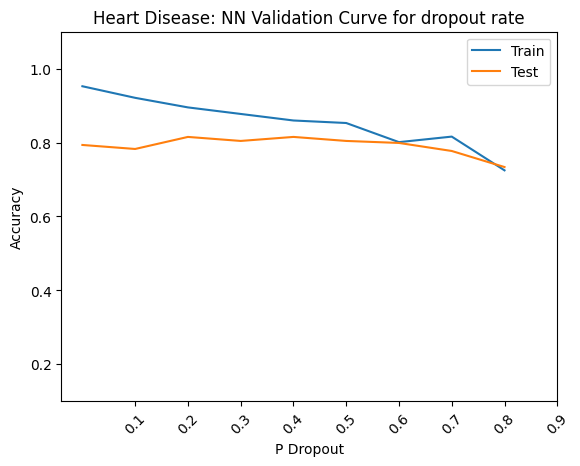

In [99]:
plt.plot(d_train_vals, label='Train')
plt.plot(d_test_vals, label='Test')
plt.xticks([i for i in range(1, 10)], [i/10 for i in range(1, 10)], rotation=45) 
plt.legend()
plt.ylim((.1, 1.1))
plt.xlabel("P Dropout")
plt.ylabel("Accuracy")
plt.title("Heart Disease: NN Validation Curve for dropout rate")
plt.savefig('./images/p5.2.png')

In [ ]:
#test NN for multiple split values

X = df.drop(columns=['Sex']).values
Y = df['Sex'].values

def train_model(num_epochs, drop_p=.5):
    input_size = x_train.shape[1]
    model = HeartDiseaseClassifier(input_size, drop_p)
    
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    max = {'epoch': 0, 'max': 0}
    for epoch in range(num_epochs):
    
        inputs = torch.Tensor(x_train).float()
        labels = torch.Tensor(y_train).view((-1, 1)).float()
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #test model ever 100 epochs
        if epoch % 100 == 0:
            test_val = score_nn(model, x_test, y_test)
            train_val = score_nn(model, x_train, y_train)
            test_vals.append(test_val)
            train_vals.append(train_val)

    return model
p_test_vals = []
p_train_vals = []
for i in range(1, 10):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=i/10, random_state=0)
    
    model = train_model(900, .2)

    p_test_val = score_nn(model, x_test, y_test)
    p_train_val = score_nn(model, x_train, y_train)
    print(p_test_val)
    p_test_vals.append(p_test_val)
    p_train_vals.append(p_train_val)
    print(p_test_vals)



0.8152173757553101
[0.8152173757553101]
0.79347825050354
[0.8152173757553101, 0.79347825050354]
0.7898550629615784
[0.8152173757553101, 0.79347825050354, 0.7898550629615784]
0.79347825050354
[0.8152173757553101, 0.79347825050354, 0.7898550629615784, 0.79347825050354]
0.7843137383460999
[0.8152173757553101, 0.79347825050354, 0.7898550629615784, 0.79347825050354, 0.7843137383460999]


In [ ]:
plt.plot(p_train_vals, label='Train')
plt.plot(p_test_vals, label='Test')
plt.xticks([i for i in range(1, 10)], [i/10 for i in range(1, 10)], rotation=45) 
plt.legend()
plt.ylim((.1, 1.1))
plt.xlabel("Test Portion (p)")
plt.ylabel("Accuracy")
plt.title("Heart Disease: NN Results")
plt.savefig('./images/p5.3.png')
